In [6]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)
import numpy as np
import imageio

Populating the interactive namespace from numpy and matplotlib


In [7]:
probes = map(imageio.imread, [
    './1_relighting/grace_probe.hdr',
    './1_relighting/rnl_probe.hdr',
    './1_relighting/uffizi_probe.hdr',
    './1_relighting/galileo_probe.hdr'    
])

teapotThetas = [0, 45, 90, 135, 180, 225, 270, 315]
teapotPhis = [-60, -30, 0, 30, 60]

teapots = []
angles = []

for teapotTheta in teapotThetas:
    for teapotPhi in teapotPhis:
        teapots.append(imageio.imread("./1_relighting/data/teapot_%d_%d.png" % (teapotTheta, teapotPhi))[:, :, 0] / 255.0)
        angles.append([teapotTheta, teapotPhi])
    
angles = np.array(angles)
Dx = np.sin(angles[:, 1]) * np.sin(angles[:, 0])
Dy = np.cos(angles[:, 0])
Dz = -np.sin(angles[:, 1]) * np.cos(angles[:, 0])


/Users/Killavus/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


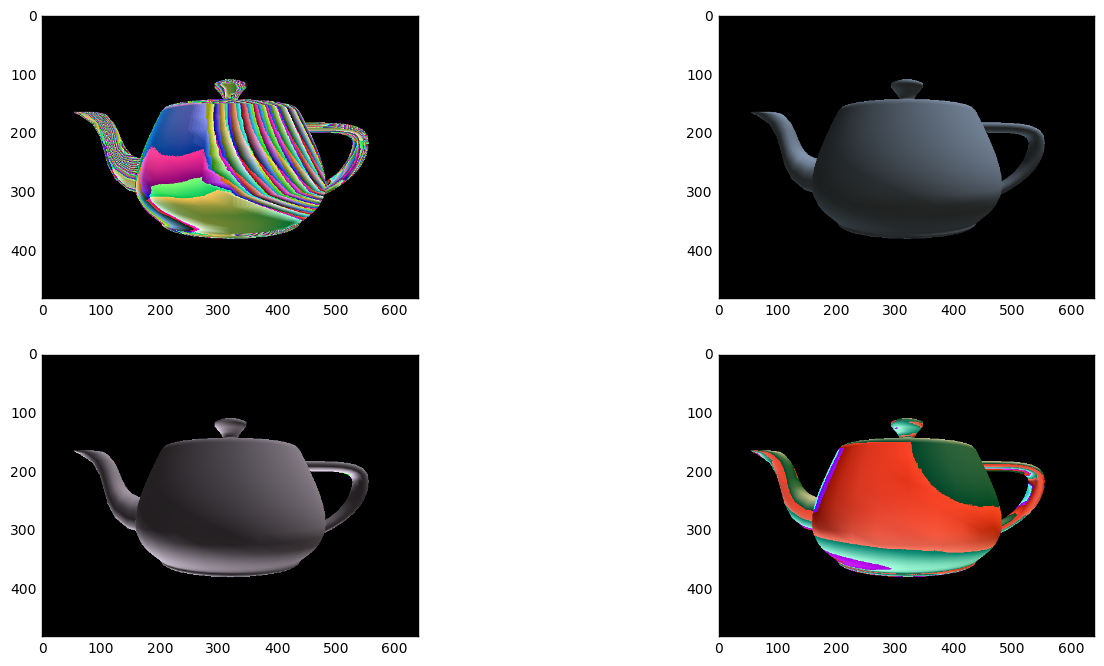

In [8]:
def computeDColors(probe, Dx, Dy, Dz):
    r = (1 / np.pi) * np.arccos(Dz) / np.sqrt(Dx ** 2 + Dy ** 2)
    U = Dx * r
    V = Dy * r
    
    Ux = ((U + 1) * 0.5 * probe.shape[0])
    Uy = ((V + 1) * 0.5 * probe.shape[1])
    
    return map(lambda coord: probe[coord[0], coord[1]], np.hstack([Ux[:, None], Uy[:, None]]))

allProbeColors = map(lambda probe: computeDColors(probe, Dx, Dy, Dz), probes)

def lightTeapot(teapots, probeColors):
    coloredTeapots = []
    for i, teapot in enumerate(teapots):
        coloredTeapots.append(np.dstack([teapot, teapot, teapot]) * probeColors[i])
        
    return np.sum(np.array(coloredTeapots), axis=0)

probeIntensities = [1, 25, 8, 5]

for i, probeColors in enumerate(allProbeColors):
    subplot(2, 2, i+1)
    imshow(lightTeapot(teapots, allProbeColors[i]) / probeIntensities[i])